In [36]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

from pydub import AudioSegment
from pydub.utils import mediainfo

speech = AudioSegment.from_wav('arctic_a0005.wav') # Read audio data from file
x = speech.get_array_of_samples() # samples x(t)
x_sr = speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
print('Sampling rate: ', x_sr)
print('Number of samples: ', len(x))

Sampling rate:  16000
Number of samples:  22640


In [37]:
duration = librosa.get_duration(filename = 'arctic_a0005.wav')
n_samples = duration * x_sr
print('duration: ', duration)
print('n_samples: ', n_samples)

duration:  1.415
n_samples:  22640.0


Text(0, 0.5, 'Amplitude')

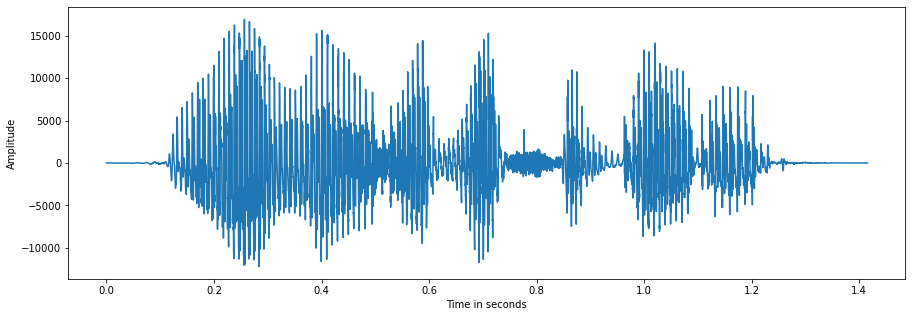

In [38]:
x_range = np.linspace(0, duration, len(x))
plt.figure(figsize = (15, 5))
plt.plot(x_range, x)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')

In [39]:
mid_point = int(len(x) / 2)
x1 = x[0:mid_point]
x2 = x[mid_point:len(x)]
x1_audio = AudioSegment(data = x1, sample_width = 2, frame_rate = x_sr, channels = 1)
x2_audio = AudioSegment(data = x2, sample_width = 2, frame_rate = x_sr, channels = 1)
x1_audio.export('arctic_a0005_1.wav', format = 'wav')
x2_audio.export('arctic_a0005_2.wav', format = 'wav')

<_io.BufferedRandom name='arctic_a0005_2.wav'>

---- 

Text(0, 0.5, 'Amplitude')

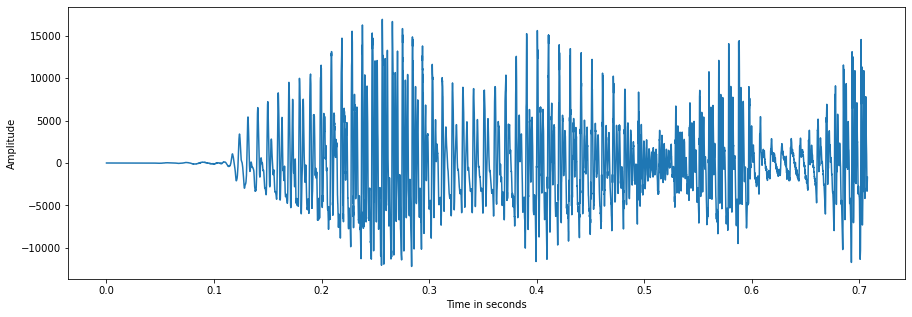

In [44]:
speech1 = AudioSegment.from_wav('arctic_a0005_1.wav') # Read audio data from file
x1 = speech1.get_array_of_samples() # samples x(t)
x_sr1 = speech1.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

duration1 = librosa.get_duration(filename = 'arctic_a0005_1.wav')
n_samples1 = duration1 * x_sr1

x_range1 = np.linspace(0, duration1, len(x1))
plt.figure(figsize = (15, 5))
plt.plot(x_range1, x1)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

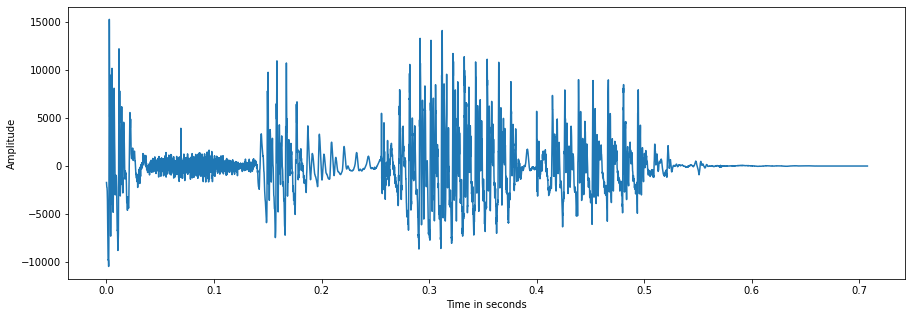

In [45]:
speech2 = AudioSegment.from_wav('arctic_a0005_2.wav') # Read audio data from file
x2 = speech2.get_array_of_samples() # samples x(t)
x_sr2 = speech2.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides

duration2 = librosa.get_duration(filename = 'arctic_a0005_2.wav')
n_samples2 = duration2 * x_sr2

x_range2 = np.linspace(0, duration2, len(x2))
plt.figure(figsize = (15, 5))
plt.plot(x_range2, x2)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')

### Fourier Transform

In [46]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 1024
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(x_sr * 0.03)
#number of samples between tww consecutive frames
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'
#bydefault, hop_length = win_length / 4
X = librosa.stft(np.float32(x), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)

In [47]:
print(X.shape)

(513, 95)


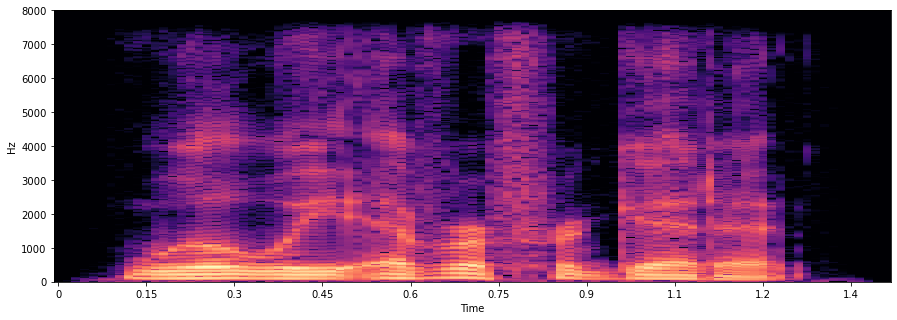

In [48]:
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr = x_sr, x_axis = 'time', y_axis = 'linear', hop_length = hop_length)

In [49]:
#number of samples
N = 600
#sample spacing
T = 1.0 / 800.0
t = np.linspace(0.0, N*T, N)
s1 = np.sin(50.0 * 2.0 * np.pi * t)
s2 = 0.5 * np.sin(80.0 * 2.0 * np.pi * t)
s = s1 + s2

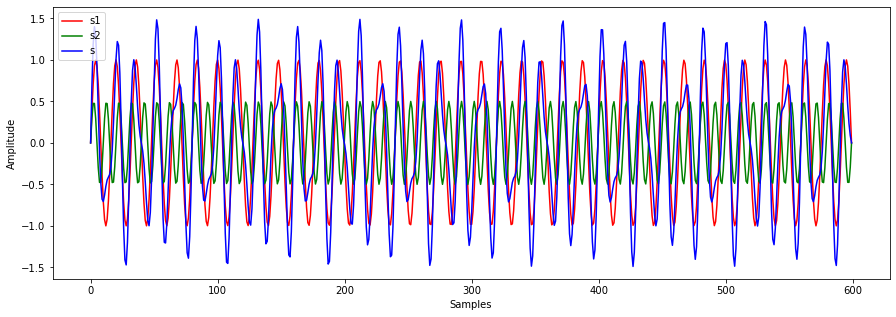

In [50]:
plt.figure(figsize = (15, 5))
plt.plot(s1, label = 's1', color = 'r')
plt.plot(s2, label = 's2', color = 'g')
plt.plot(s, label = 's', color = 'b')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend(loc = "upper left")

C:\Users\shane\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=600
  return f(*args, **kwargs)


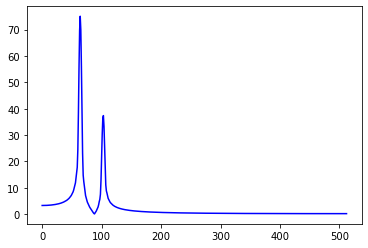

In [51]:
S = librosa.stft(s, n_fft = 1024, window = 'hann', hop_length = N, win_length = N)
S_0 = S[:, 0]
mag_S_0 = np.abs(S_0)
plt.plot(mag_S_0, color = 'b')

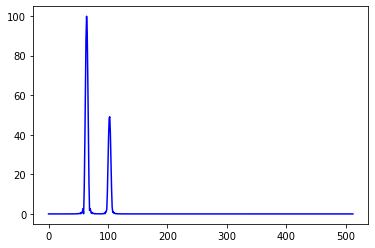

In [52]:
#we define a window length m with less number of samples
m = 400
S = librosa.stft(s, n_fft = 1024, window = 'hann', hop_length = int(m / 2), win_length = m)
#we take S_1, which is an intermediate frame.
S_1 = S[:, 1]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')

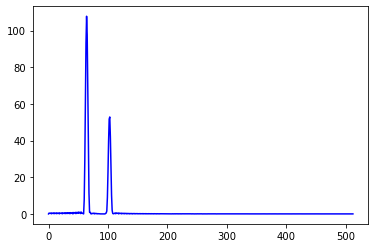

In [53]:
#we define a window length m with less number of samples
m = 400
S = librosa.stft(s, n_fft = 1024, window = 'hamming', hop_length = int(m / 2), win_length = m)
#we take S_1, which is an intermediate frame.
S_1 = S[:, 1]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')

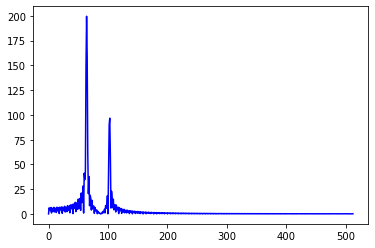

In [54]:
#we define a window length m with less number of samples
m = 400
S = librosa.stft(s, n_fft = 1024, window = 'boxcar', hop_length = int(m / 2), win_length = m)
#we take S_1, which is an intermediate frame.
S_1 = S[:, 1]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')

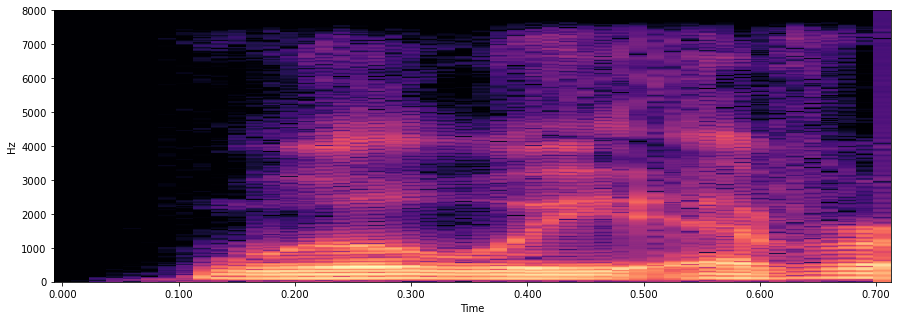

In [55]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 1024
#window size: the number of samples per frame
#each frame is of 30ms
win_length1 = int(x_sr1 * 0.03)
#number of samples between tww consecutive frames
hop_length1 = int(win_length1 / 2)
#windowing technique
window = 'hann'
#bydefault, hop_length = win_length / 4
X1 = librosa.stft(np.float32(x1), n_fft = freq_range, window = window, hop_length = hop_length1, win_length = win_length1)
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X1))
librosa.display.specshow(Xdb, sr = x_sr1, x_axis = 'time', y_axis = 'linear', hop_length = hop_length1)

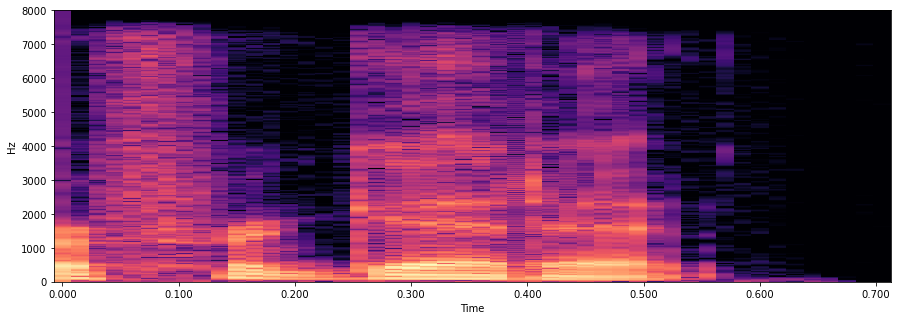

In [56]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 1024
#window size: the number of samples per frame
#each frame is of 30ms
win_length2 = int(x_sr2 * 0.03)
#number of samples between tww consecutive frames
hop_length2 = int(win_length2 / 2)
#windowing technique
window = 'hann'
#bydefault, hop_length = win_length / 4
X2 = librosa.stft(np.float32(x2), n_fft = freq_range, window = window, hop_length = hop_length2, win_length = win_length2)
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X2))
librosa.display.specshow(Xdb, sr = x_sr2, x_axis = 'time', y_axis = 'linear', hop_length = hop_length2)